In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Airlines_data = pd.read_csv('Airlines_data.csv') 

In [3]:
Airlines_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration (in Hours),days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Exploration

In [4]:
Airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                300153 non-null  int64  
 1   airline              300153 non-null  object 
 2   flight               300153 non-null  object 
 3   source_city          300153 non-null  object 
 4   departure_time       300153 non-null  object 
 5   stops                300153 non-null  object 
 6   arrival_time         300153 non-null  object 
 7   destination_city     300153 non-null  object 
 8   class                300153 non-null  object 
 9   duration (in Hours)  300153 non-null  float64
 10  days_left            300153 non-null  int64  
 11  price                300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
Airlines_data.describe()

,index,duration (in Hours),days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [74]:
# Types of Airlines and their count

Airlines_count = Airlines_data['airline'].value_counts()

# sns.countplot(data=Airlines_count,x='airline')

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
# How many different flights are there

Airlines_data['flight'].nunique()

1561

In [8]:
# Source cities with most number of flights

Airlines_data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [9]:
# Destination cities are the most common

Airlines_data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

## Price Analysis

In [11]:
# Average flight price overall

Airlines_data['price'].mean().round(2)

np.float64(20889.66)

In [12]:
# average price vary by airline

Airlines_data.groupby('airline')['price'].mean().sort_values(ascending=False).round(2)

airline
Vistara      30396.54
Air_India    23507.02
SpiceJet      6179.28
GO_FIRST      5652.01
Indigo        5324.22
AirAsia       4091.07
Name: price, dtype: float64

In [14]:
# average price vary by class (Economy vs Business)

Airlines_data.groupby('class')['price'].mean().round(2)

class
Business    52540.08
Economy      6572.34
Name: price, dtype: float64

In [88]:
# city pair (source_city → destination_city) has the highest average price

Airlines_data.groupby(['source_city','destination_city'])['price'].mean().sort_values(ascending=False).head(10).round(2)

source_city  destination_city
Chennai      Bangalore           25081.85
Kolkata      Chennai             23660.36
Bangalore    Kolkata             23500.06
             Chennai             23321.85
Mumbai       Bangalore           23147.87
Bangalore    Mumbai              23128.62
Mumbai       Chennai             22781.90
Chennai      Mumbai              22765.85
Kolkata      Bangalore           22744.81
Chennai      Kolkata             22669.93
Name: price, dtype: float64

In [23]:
# The number of stops affect the price

Airlines_data.groupby('stops')['price'].mean().round(2)

stops
one            22900.99
two_or_more    14113.45
zero            9375.94
Name: price, dtype: float64

<Axes: xlabel='days_left'>

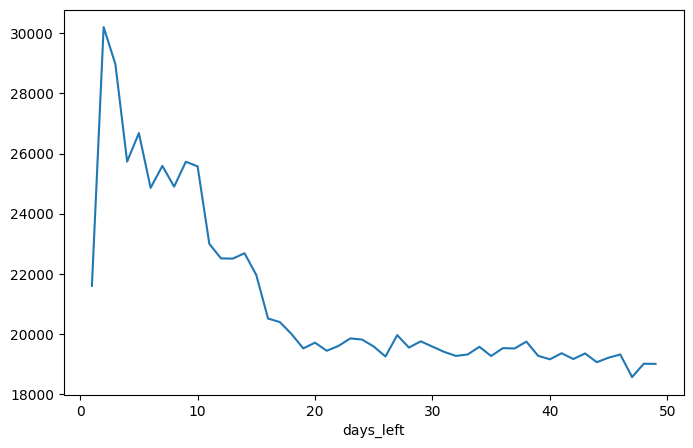

In [25]:
# How does days_left before departure affect the price ? 

Airlines_data.groupby('days_left')['price'].mean().plot(kind='line', figsize=(8,5))

## Time and Duration Analysis 

In [27]:
# average flight duration

Airlines_data['duration (in Hours)'].mean().round(2)

np.float64(12.22)

In [31]:
# airline with the shortest average duration

Airlines_data.groupby('airline')['duration (in Hours)'].mean().sort_values().round(2)

airline
Indigo        5.80
GO_FIRST      8.76
AirAsia       8.94
SpiceJet     12.58
Vistara      13.33
Air_India    15.50
Name: duration (in Hours), dtype: float64

In [35]:
# How does departure time affect average prices

Airlines_data.groupby('departure_time')['price'].mean().sort_values(ascending=False).round(2)

departure_time
Night            23062.15
Morning          21630.76
Evening          21232.36
Early_Morning    20370.68
Afternoon        18179.20
Late_Night        9295.30
Name: price, dtype: float64

In [38]:
# Which routes have the longest and shortest durations?

Airlines_data.groupby(['source_city', 'destination_city'])['duration (in Hours)'].mean().sort_values().round(2)

source_city  destination_city
Bangalore    Delhi                9.78
Mumbai       Delhi                9.82
Delhi        Bangalore           10.35
             Mumbai              10.37
Hyderabad    Delhi               10.83
Bangalore    Mumbai              10.91
Chennai      Delhi               11.15
Kolkata      Delhi               11.60
Mumbai       Bangalore           11.61
Hyderabad    Mumbai              11.96
             Bangalore           12.09
Chennai      Mumbai              12.37
Delhi        Chennai             12.43
             Hyderabad           12.52
Mumbai       Chennai             12.67
Delhi        Kolkata             12.74
Mumbai       Kolkata             12.84
Kolkata      Mumbai              12.99
Bangalore    Kolkata             13.10
Chennai      Hyderabad           13.15
Mumbai       Hyderabad           13.26
Hyderabad    Chennai             13.29
             Kolkata             13.54
Kolkata      Bangalore           13.79
             Hyderabad           1

## Demand & Popularity

In [41]:
# Which airline operates the most flights?

Airlines_data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [46]:
# source city with the most flights

Airlines_data.groupby('source_city')['flight'].count().sort_values(ascending=False)

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: flight, dtype: int64

In [49]:
# destination city with the most flights

Airlines_data['destination_city'].value_counts().sort_values(ascending=False)

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

## Advanced Insights

In [51]:
# correlation between flight duration and price

# Interpretation: Value close to 1 = strong positive relation, close to -1 = strong negative.

Airlines_data['duration (in Hours)'].corr(Airlines_data['price'])

np.float64(0.20422236784542708)

In [53]:
# correlation between days_left and price

Airlines_data['days_left'].corr(Airlines_data['price'])

np.float64(-0.09194853217143828)

In [67]:
# Cheapest airline for each route

# here values are NaN bcoz there are no values

# eg : Airlines_data[Airlines_data['airline']=='AirAsia']['class'].value_counts()

Airlines_data.groupby(['airline', 'class'])['price'].mean().unstack()

class,Business,Economy
airline,,
AirAsia,NaN,4091.072742
Air_India,47131.039212,7313.682169
GO_FIRST,NaN,5652.007595
Indigo,NaN,5324.216303
SpiceJet,NaN,6179.278881
Vistara,55477.027777,7806.943645


In [71]:
# Price difference between classes by airline

Airlines_data.groupby(['airline', 'class'])['price'].mean().unstack().round(2)

class,Business,Economy
airline,,
AirAsia,NaN,4091.07
Air_India,47131.04,7313.68
GO_FIRST,NaN,5652.01
Indigo,NaN,5324.22
SpiceJet,NaN,6179.28
Vistara,55477.03,7806.94


## Visualization

In [76]:
# Set Seaborn theme
sns.set(style="whitegrid", palette="pastel")

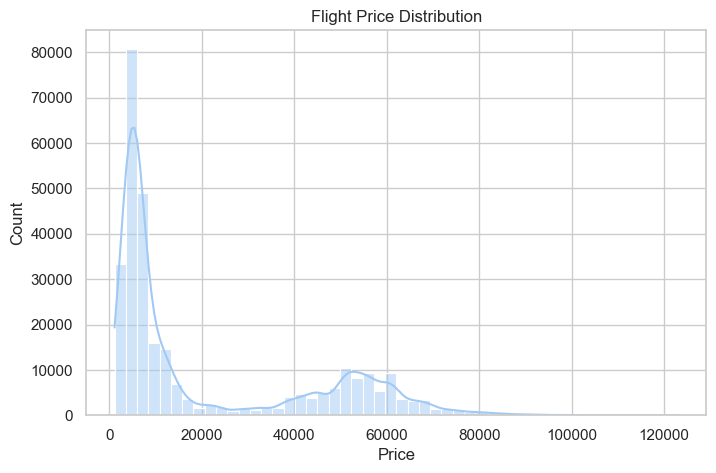

In [89]:
#  Histogram: Price Distribution

plt.figure(figsize=(8,5))
sns.histplot(Airlines_data['price'], bins=50, kde=True)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Prices often cluster at lower values, with a long tail toward high prices.

Most economy tickets will likely be in the lower range (e.g., ₹3,000–₹7,000), while a smaller number of business tickets create the high-end tail.

If the histogram is bimodal (two peaks), it may represent two distinct classes (Economy vs Business).

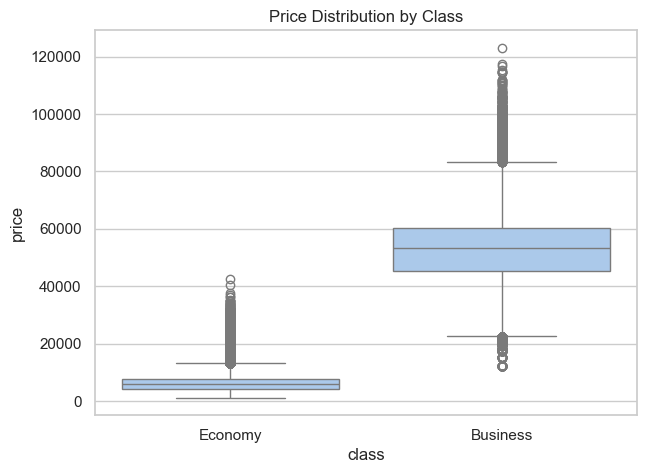

In [78]:
# Boxplot: Price vs Class

plt.figure(figsize=(7,5))
sns.boxplot(data=Airlines_data, x='class', y='price')
plt.title("Price Distribution by Class")
plt.show()

Business class box will be much higher on the y-axis, showing higher median and range.

Economy class will have fewer extreme outliers; Business will have many, due to premium routes and last-minute bookings.

The gap between the medians is an indicator of how much extra people pay for Business.

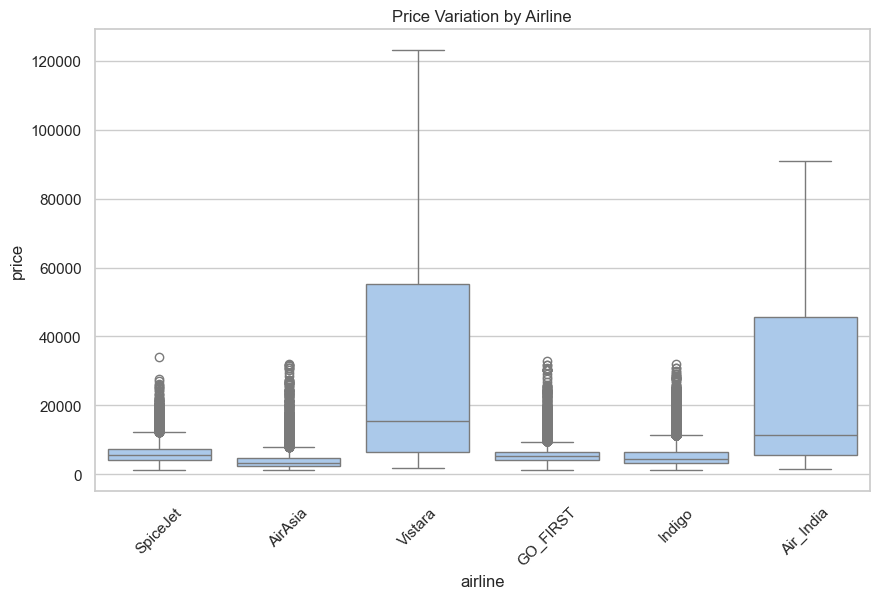

In [79]:
# Boxplot: Price vs Airline

plt.figure(figsize=(10,6))
sns.boxplot(data=Airlines_data, x='airline', y='price')
plt.title("Price Variation by Airline")
plt.xticks(rotation=45)
plt.show()

Low-cost carriers (e.g., Indigo, AirAsia) will have smaller boxes and lower medians.

Full-service airlines (e.g., Vistara, Air India) will have taller boxes with higher medians and more outliers.

If an airline has very high outliers, it might be due to last-minute business class bookings or high-demand routes.

C:\Users\chinn\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


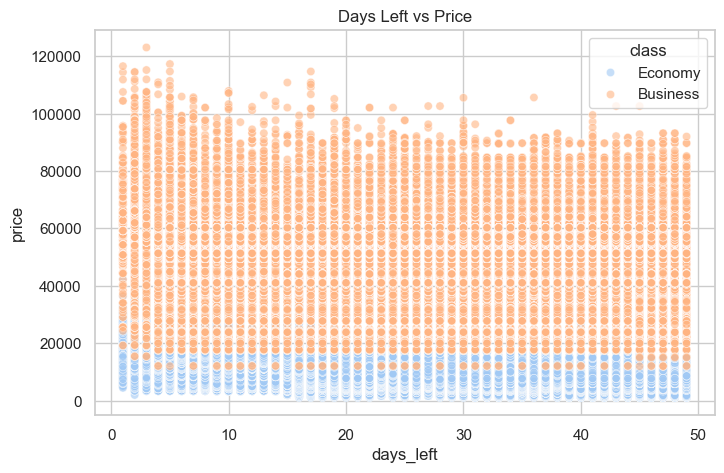

In [80]:
# Scatterplot: Days Left vs Price

plt.figure(figsize=(8,5))
sns.scatterplot(data=Airlines_data, x='days_left', y='price', hue='class', alpha=0.6)
plt.title("Days Left vs Price")
plt.show()

For many airlines, prices increase as days_left approaches zero (negative correlation).

You might see scattered low prices for early bookings (20+ days left) and sharp spikes close to the departure date.

Some budget carriers may have flat pricing regardless of days left.

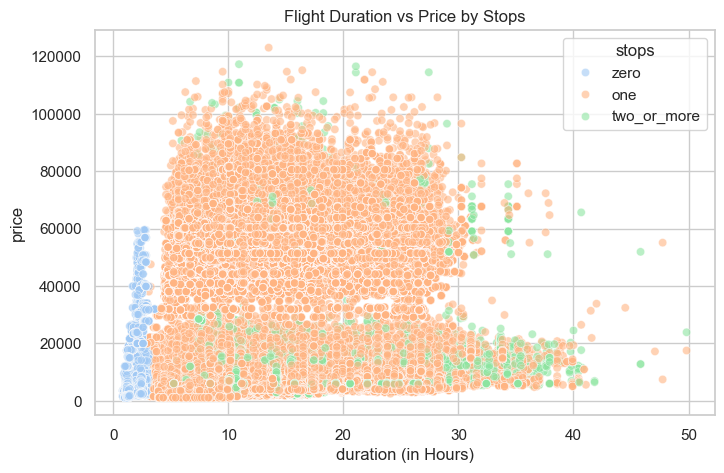

In [81]:
# Scatterplot: Duration vs Price

plt.figure(figsize=(8,5))
sns.scatterplot(data=Airlines_data, x='duration (in Hours)', y='price', hue='stops', alpha=0.6)
plt.title("Flight Duration vs Price by Stops")
plt.show()


Non-stop flights may cost more despite shorter duration (convenience factor).

Flights with multiple stops might have lower prices but much longer durations.

A diagonal upward trend may suggest longer flights = higher cost (especially for international).

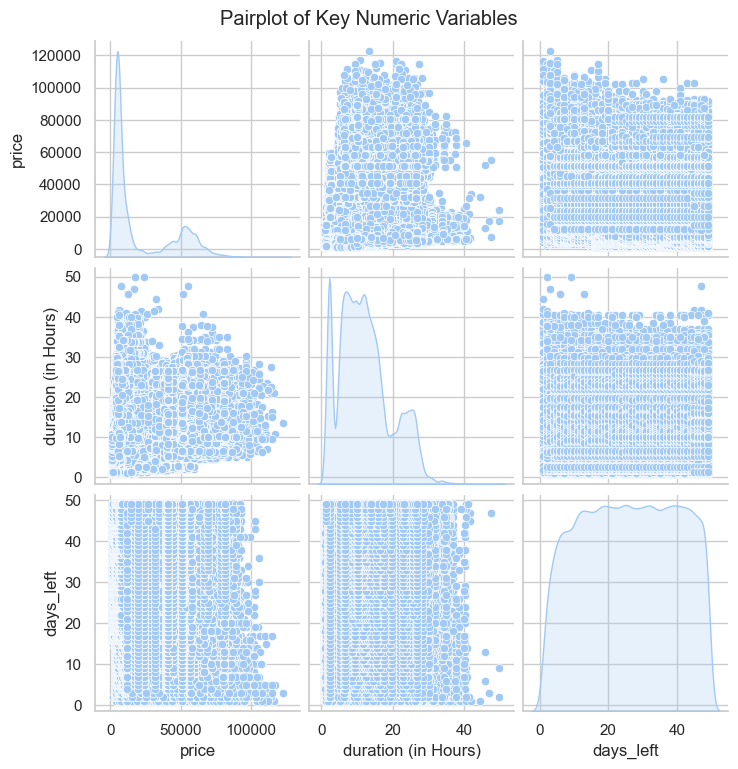

In [82]:
# Pairplot: Numeric Columns

numeric_cols = ['price', 'duration (in Hours)', 'days_left']
sns.pairplot(Airlines_data[numeric_cols], diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.show()

price vs duration: May show a weak positive correlation.

price vs days_left: Often a weak negative correlation.

duration vs days_left: Usually no strong relationship (duration is route-dependent).

Diagonal KDE plots will show distribution shapes — price may be right-skewed.

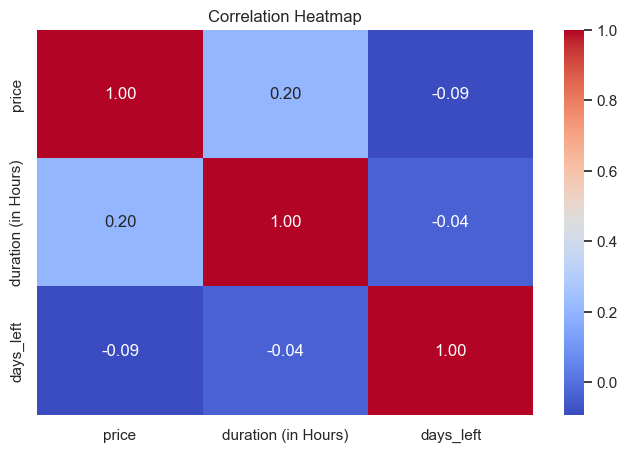

In [83]:
# Correlation Heatmap

plt.figure(figsize=(8,5))
corr = Airlines_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

price and days_left → weak to moderate negative correlation.

price and duration → weak positive correlation.

duration and days_left → near zero correlation (no real link).

If correlations are all weak, it means other categorical factors (airline, class, stops) drive most of the variation.